In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from keras.datasets.mnist import load_data

Using TensorFlow backend.


In [3]:
(train_digits,train_labels),(test_digits,test_labels)=load_data()
print(train_digits.shape)
print(test_digits.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [4]:

import pandas as pd
pd.Series(train_labels).value_counts

<bound method IndexOpsMixin.value_counts of 0        5
1        0
2        4
3        1
4        9
        ..
59995    8
59996    3
59997    5
59998    6
59999    8
Length: 60000, dtype: uint8>

In [5]:
pd.Series(test_labels).value_counts

<bound method IndexOpsMixin.value_counts of 0       7
1       2
2       1
3       0
4       4
       ..
9995    2
9996    3
9997    4
9998    5
9999    6
Length: 10000, dtype: uint8>

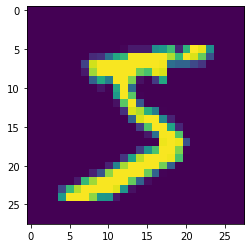

In [6]:
plt.imshow(train_digits[0])

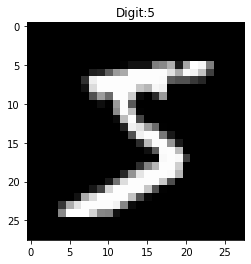

In [7]:
plt.title("Digit:"+str(train_labels[0]))
plt.imshow(train_digits[0],cmap="gray")

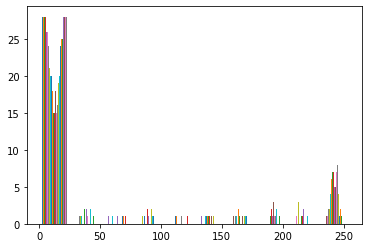

In [8]:
plt.hist(train_digits[0])
plt.show()

In [9]:
samp=np.random.randint(train_digits.shape[0],size=16)
samp

array([55241, 18261, 52722, 55890, 19039, 59563, 23393, 47227, 14926,
       32190, 41212, 28965, 27614, 15567, 32633,   182])

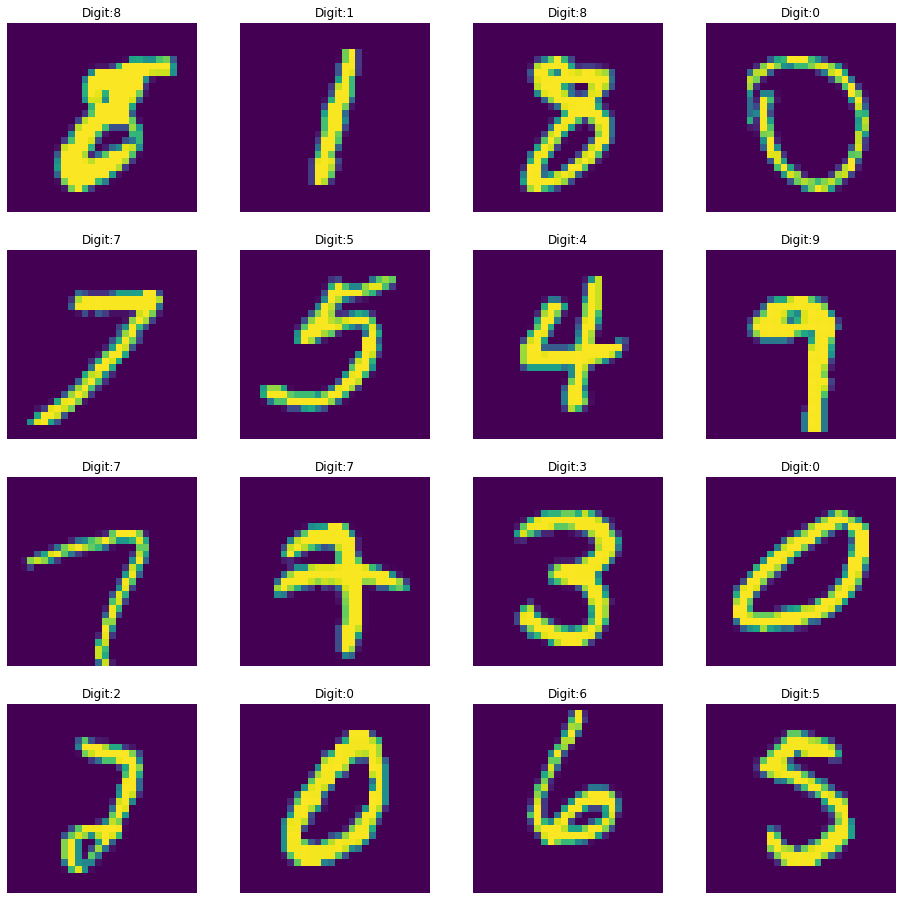

In [10]:
plt.figure(figsize=(16,16))
j=1
for i in samp:
  plt.subplot(4,4,j)
  plt.imshow(train_digits[i])
  plt.title("Digit:"+str(train_labels[i]))
  plt.axis("off")
  j=j+1

In [11]:
train_digits_sc=train_digits/255.0
test_digits_sc=test_digits/255.0

In [12]:
from keras.utils import to_categorical

In [13]:
train_labels_cat=to_categorical(train_labels)

In [14]:
test_labels_cat=to_categorical(test_labels)

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(train_digits_sc,train_labels_cat,test_size=0.1,random_state=32)
print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

(54000, 28, 28)
(6000, 28, 28)
(54000, 10)
(6000, 10)


In [16]:
from keras.models import Sequential
from keras.layers import Dense,Flatten

model = Sequential()
# first layer we need to mention the input shape

model.add(Flatten(input_shape=(28,28)))
## 784 pixel values as input to this Dense. 128 Neurons in the layers
model.add(Dense(128,activation='relu'))# 784 * 128+128
model.add(Dense(128,activation='relu'))# 
model.add(Dense(64,activation='relu'))
model.add(Dense(256,activation='relu'))
#Final layer
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 256)               16640     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 144,458
Trainable params: 144,458
Non-trainable params: 0
________________________________________________

In [17]:
model.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [18]:
history=model.fit(x=x_train,y=y_train,epochs=5,validation_data=(x_val,y_val),batch_size=32)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 6s 109us/step - loss: 0.2481 - accuracy: 0.9234 - val_loss: 0.1397 - val_accuracy: 0.9595
Epoch 2/5
54000/54000 [==============================] - 6s 102us/step - loss: 0.1063 - accuracy: 0.9678 - val_loss: 0.1002 - val_accuracy: 0.9707
Epoch 3/5
54000/54000 [==============================] - 6s 102us/step - loss: 0.0789 - accuracy: 0.9763 - val_loss: 0.1239 - val_accuracy: 0.9673
Epoch 4/5
54000/54000 [==============================] - 6s 103us/step - loss: 0.0651 - accuracy: 0.9800 - val_loss: 0.1146 - val_accuracy: 0.9717
Epoch 5/5
54000/54000 [==============================] - 6s 103us/step - loss: 0.0519 - accuracy: 0.9842 - val_loss: 0.1210 - val_accuracy: 0.9693


In [19]:
model.evaluate(test_digits_sc,test_labels_cat)

10000/10000 [==============================] - 0s 29us/step


[0.09885476954927436, 0.9721999764442444]

In [20]:
print(test_digits_sc.shape)
print(test_digits_sc[0].shape)
print(np.expand_dims(test_digits_sc[0],axis=0).shape)

(10000, 28, 28)
(28, 28)
(1, 28, 28)


In [21]:
model.predict(np.expand_dims(test_digits_sc[0],axis=0))

array([[5.9802623e-08, 1.1195446e-07, 6.7491014e-06, 1.2060920e-06,
        6.9521495e-09, 2.3598184e-07, 1.4119024e-10, 9.9998760e-01,
        1.0918716e-08, 4.0168688e-06]], dtype=float32)

In [22]:

model.predict(test_digits_sc[:10])

array([[5.98025025e-08, 1.11954250e-07, 6.74908824e-06, 1.20609081e-06,
        6.95214952e-09, 2.35981176e-07, 1.41189171e-10, 9.99987602e-01,
        1.09186953e-08, 4.01686111e-06],
       [1.59475655e-09, 2.56821142e-08, 9.99999285e-01, 6.03895899e-07,
        5.41346594e-08, 1.23233530e-08, 4.41302099e-11, 4.81258660e-08,
        4.56033469e-08, 9.91618176e-11],
       [8.82593486e-06, 9.99703825e-01, 2.42549759e-05, 3.01074010e-07,
        5.12255501e-05, 4.36143637e-06, 6.13267985e-05, 9.59670651e-05,
        4.79751361e-05, 1.79992651e-06],
       [9.99701321e-01, 1.84458486e-07, 2.40134425e-04, 3.98709108e-06,
        3.56523947e-06, 3.13752457e-06, 6.55030362e-06, 1.23990239e-05,
        3.79643052e-06, 2.49562563e-05],
       [9.07533774e-07, 1.14804665e-04, 9.27080237e-06, 1.92489949e-07,
        9.98961568e-01, 2.55839473e-06, 3.94889503e-05, 5.01132781e-05,
        2.00844333e-05, 8.01058486e-04],
       [5.37844812e-07, 9.99955893e-01, 3.42022986e-07, 5.60231461e-09,
   

In [23]:
model.predict_classes(np.expand_dims(test_digits_sc[0],axis=0))

array([7])

In [24]:
model.predict_proba(np.expand_dims(test_digits_sc[0],axis=0))

array([[5.9802623e-08, 1.1195446e-07, 6.7491014e-06, 1.2060920e-06,
        6.9521495e-09, 2.3598184e-07, 1.4119024e-10, 9.9998760e-01,
        1.0918716e-08, 4.0168688e-06]], dtype=float32)

In [25]:
history.history

{'accuracy': [0.9234259, 0.96783334, 0.9762963, 0.9799815, 0.9842408],
 'loss': [0.2481430881936793,
  0.10628083065690266,
  0.07886253943535741,
  0.06510418938893686,
  0.051884779870600646],
 'val_accuracy': [0.9595000147819519,
  0.9706666469573975,
  0.9673333168029785,
  0.971666693687439,
  0.9693333506584167],
 'val_loss': [0.13966652177770933,
  0.10021451332171757,
  0.12388650040701031,
  0.11455939959579457,
  0.12098881654573294]}

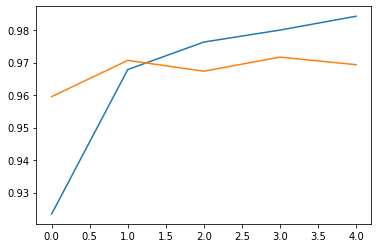

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [27]:
model1 = Sequential()
# first layer we need to mention the input shape

model1.add(Flatten(input_shape=(28,28)))
## 784 pixel values as input to this Dense. 128 Neurons in the layers
model1.add(Dense(128,activation='relu'))# 784 * 128+128
model1.add(Dense(256,activation='relu'))# 
model1.add(Dense(64,activation='relu'))
model1.add(Dense(256,activation='relu'))
#Final layer
model1.add(Dense(10,activation='sigmoid'))
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_8 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_9 (Dense)              (None, 256)               16640     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                2570      
Total params: 169,162
Trainable params: 169,162
Non-trainable params: 0
________________________________________________

In [28]:
model1.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [29]:
history=model1.fit(x=x_train,y=y_train,epochs=5,validation_data=(x_val,y_val),batch_size=32)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 7s 123us/step - loss: 0.2623 - accuracy: 0.9211 - val_loss: 0.1527 - val_accuracy: 0.9595
Epoch 2/5
54000/54000 [==============================] - 6s 114us/step - loss: 0.1128 - accuracy: 0.9656 - val_loss: 0.1223 - val_accuracy: 0.9657
Epoch 3/5
54000/54000 [==============================] - 6s 118us/step - loss: 0.0831 - accuracy: 0.9741 - val_loss: 0.1199 - val_accuracy: 0.9673
Epoch 4/5
54000/54000 [==============================] - 6s 119us/step - loss: 0.0619 - accuracy: 0.9810 - val_loss: 0.0898 - val_accuracy: 0.9758
Epoch 5/5
54000/54000 [==============================] - 6s 118us/step - loss: 0.0511 - accuracy: 0.9844 - val_loss: 0.1002 - val_accuracy: 0.9747


In [30]:
model1.evaluate(test_digits_sc,test_labels_cat)

10000/10000 [==============================] - 0s 30us/step


[0.08751933365748264, 0.9771000146865845]

In [31]:
print(test_digits_sc.shape)
print(test_digits_sc[0].shape)
print(np.expand_dims(test_digits_sc[0],axis=0).shape)

(10000, 28, 28)
(28, 28)
(1, 28, 28)


In [32]:
model.predict(np.expand_dims(test_digits_sc[0],axis=0))

array([[5.9802623e-08, 1.1195446e-07, 6.7491014e-06, 1.2060920e-06,
        6.9521495e-09, 2.3598184e-07, 1.4119024e-10, 9.9998760e-01,
        1.0918716e-08, 4.0168688e-06]], dtype=float32)

In [33]:
model.predict(test_digits_sc[:10])

array([[5.98025025e-08, 1.11954250e-07, 6.74908824e-06, 1.20609081e-06,
        6.95214952e-09, 2.35981176e-07, 1.41189171e-10, 9.99987602e-01,
        1.09186953e-08, 4.01686111e-06],
       [1.59475655e-09, 2.56821142e-08, 9.99999285e-01, 6.03895899e-07,
        5.41346594e-08, 1.23233530e-08, 4.41302099e-11, 4.81258660e-08,
        4.56033469e-08, 9.91618176e-11],
       [8.82593486e-06, 9.99703825e-01, 2.42549759e-05, 3.01074010e-07,
        5.12255501e-05, 4.36143637e-06, 6.13267985e-05, 9.59670651e-05,
        4.79751361e-05, 1.79992651e-06],
       [9.99701321e-01, 1.84458486e-07, 2.40134425e-04, 3.98709108e-06,
        3.56523947e-06, 3.13752457e-06, 6.55030362e-06, 1.23990239e-05,
        3.79643052e-06, 2.49562563e-05],
       [9.07533774e-07, 1.14804665e-04, 9.27080237e-06, 1.92489949e-07,
        9.98961568e-01, 2.55839473e-06, 3.94889503e-05, 5.01132781e-05,
        2.00844333e-05, 8.01058486e-04],
       [5.37844812e-07, 9.99955893e-01, 3.42022986e-07, 5.60231461e-09,
   

In [34]:
model.predict_classes(np.expand_dims(test_digits_sc[0],axis=0))

array([7])

In [35]:
model.predict_proba(np.expand_dims(test_digits_sc[0],axis=0))

array([[5.9802623e-08, 1.1195446e-07, 6.7491014e-06, 1.2060920e-06,
        6.9521495e-09, 2.3598184e-07, 1.4119024e-10, 9.9998760e-01,
        1.0918716e-08, 4.0168688e-06]], dtype=float32)

In [36]:
history.history

{'accuracy': [0.9211481, 0.9656482, 0.9741296, 0.981, 0.9843889],
 'loss': [0.2622670727548776,
  0.11282621524441573,
  0.08314311295713264,
  0.06185911735189492,
  0.051119491889236354],
 'val_accuracy': [0.9595000147819519,
  0.965666651725769,
  0.9673333168029785,
  0.9758333563804626,
  0.9746666550636292],
 'val_loss': [0.15268795526524384,
  0.12232111051678657,
  0.11988049498448769,
  0.08983619714155794,
  0.10019636900350451]}

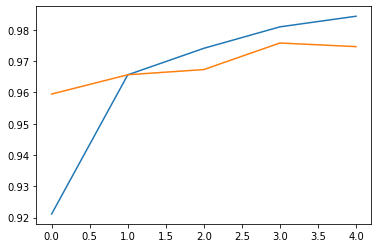

In [37]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])